# Introducción

En el siguiente ejercicio, se mezclan dos imagenes parametrizadas.

Una de las imagenes se va a representar como el background de la resultante, mientras que la otra imagen se va a montar al frente (solo aquellos pixeles que sean de color negro).

Para ello, se toman todos los pixeles y se los compara con el RGB negro [0, 0, 0]. Si el pixel tomado es de color negro se deja al frente de la imagen resultante; para todos los pixels que no sean de color negro se toman los pixeles de la imagen de background.

Con este ejercicio, se pretende entender el funcionamiento basico del Lenguaje Python [1], Google Colab [2,3] y tratamiento de imagenes a bajo nivel.


---
# Armado del ambiente
Se toman la dirección web de dos imagenes.

1 - En blanco y negro.

2 - Una imagen en color que se representara como background de la imagen resultante.

Ambas imagenes se las deja disponible en el contexto del cuaderno Colab.




In [ ]:
#@title ## Parámetros de ejecución

#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_imagen = "https://i.pinimg.com/originals/be/4a/98/be4a98faeda134f012cc442bd67536a7.jpg" #@param {type:"string"}

#@markdown ---
#@markdown ### Especifique la URL del background:
background_img = "https://previews.123rf.com/images/hollygraphic/hollygraphic1607/hollygraphic160700009/61610728-resumen-de-antecedentes-las-formas-geom%C3%A9tricas-de-colores-poligonal-vector-de-textura-colores-del-arco.jpg" #@param {type:"string"}

!wget {url_imagen} -O imagen.jpg
!wget {background_img} -O background_img.jpg


# Desarrollo - Ejecución CPU.

Combinación de dos imagenes.

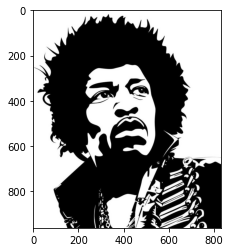

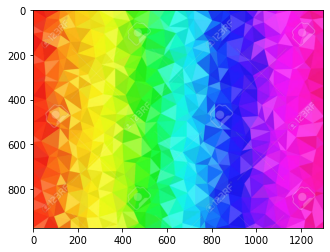

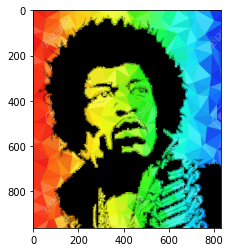

Tiempo en procesar las imagenes: 4169.262 [ms]
Tiempo de representacion de las imagenes: 883.909 [ms]
Tiempo Total: 5057.719 [ms]


In [11]:
 %matplotlib inline
from datetime import datetime
import  matplotlib.pyplot as plt
import numpy
from PIL import Image 

tiempo_total = datetime.now()

# ------------------------------------------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos --------------
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# ------------------------------------------------------------------------------

# Cargo la imagen y el background. ---------------------------------------------
try:
    imagepath = 'imagen.jpg'
    image = Image.open(imagepath)

    imagepath = 'background_img.jpg'
    background = Image.open(imagepath)
except IOError:
    print("No se pudo abrir la imagen de la url: ", imagepath)

# Proporciones de la imagen y del background. ---------------------------------- 
img_alto, img_ancho = image.size 
back_alto, back_ancho = background.size 

try:
  if (img_alto > back_alto) or (img_ancho > back_ancho):
    raise ValueError("El bacground debe ser de un tamaño igual o superior al de la imagen.");

  tiempo_img = datetime.now()

  # Cargo la imagen y el background en arrays. ---------------------------------
  img_cpu = numpy.asarray(image)
  back_cpu = numpy.asarray(background)
  result_cpu = numpy.empty_like(img_cpu)

  for y  in range(0, img_ancho):
    for x in range(0, img_alto):
      img_color = img_cpu[y][x]
      back_color = back_cpu[y][x]
      if img_color.all() == 0:
        result_cpu[y][x] = img_color
      else:
        result_cpu[y][x] = back_color

  # Tiempos de respuesta de CPU. -----------------------------------------------
  tiempo_img = datetime.now() - tiempo_img
  tiempo_representacion = datetime.now()

  # Muestro la imagen original. ------------------------------------------------
  plt.figure()
  plt.imshow(img_cpu)
  plt.show()

  # Muestro el background original. --------------------------------------------
  plt.imshow(back_cpu)
  plt.show()
  
  # Muestro la imagen resultante. ----------------------------------------------
  plt.imshow(result_cpu)
  plt.show()

  tiempo_representacion = datetime.now() - tiempo_representacion 
  tiempo_total = datetime.now() - tiempo_total

  print( "Tiempo en procesar las imagenes:", tiempo_en_ms(tiempo_img), "[ms]")
  print( "Tiempo de representacion de las imagenes:", tiempo_en_ms(tiempo_representacion), "[ms]")
  print( "Tiempo Total:", tiempo_en_ms(tiempo_total), "[ms]")

except ValueError as valerr:
  print (valerr)
except: 
  print("Houston we have a problem!")


---
# Tabla de pasos de ejecución del programa


 Procesador | Función | Detalle
------------|---------|----------
CPU      |  @param                | Lectura de la dirección URL de la imagen en blanco y negro (jpg) a procesar.
CPU      |  @param                | Lectura de la dirección URL del background.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  datetime.now()        | Toma el tiempo actual.
CPU      |  Image.open()          | Abre el archivo de la imagen.
CPU      |  Image.open()          | Abre el archivo del background.
CPU      |  numpy.asarray(imagen) | Convierte el formato comprimido JPG a RAW.
CPU      |  numpy.asarray(background) | Convierte el formato comprimido JPG a RAW.
CPU      |  for...for..           | Selecciona todos los pixeles de color negro. Si el pixel es de color negro se copia en la imagen de resultado, en caso contrario se copia el background.
CPU      |  plt.imshow            | Muestra la imagen original.
CPU      |  plt.imshow            | Muestra el background original.
CPU      |  plt.imshow            | Muestra la imagen de resultado.
CPU      |  print()               | Informa los tiempos de cada funcionalidad.




---
# Conclusión

Diferencia entre serie y paralelo, comparando 5 resultados

Con este ejercicio, pude aprender sobre el funcionamiento paralelizable en 2 dimensiones; sobre el lenguaje python, el funcionamiento de funciones como ZIP o las incluidas por numpy.

Que la sección conclusiones deban tener: Breve repaso de los puntos más relevantes del trabajo; Explicación sobre las lecciones aprendidas que deja el ejercicio;



---
# Bibliografía


[1] MARKDOWN SYNTAX Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

[2] Introducción a Python: [Página Colab](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb) 

[3] Tutorial Point Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)


